In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
import operator
import random

Declaração das Constantes

In [29]:
COLUMN_ROW = 5
SIZE_MATRIX = COLUMN_ROW * COLUMN_ROW
SIZE_POPULATION = 20

Gerando individuos aleatoriamente

In [3]:
individuals = np.random.randint(0,2,(SIZE_POPULATION, SIZE_MATRIX))
print(individuals)

[[1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1]
 [0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0]
 [1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1]
 [0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1]
 [1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0]
 [1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1]
 [0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1]
 [0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1]
 [1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0]
 [1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1]
 [1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0]
 [1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1]
 [1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0]
 [0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1]
 [0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1]
 [0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0]
 [0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 

Gerando genótipo aleatoriamente

Função para exibir amtrix de elementos

In [4]:
def plot_element(element, text):
    fig, ax = plt.subplots()
    matrix = element.reshape((COLUMN_ROW, COLUMN_ROW))
    im = ax.imshow(matrix)
    ax.set_title(text)
    fig.tight_layout()
    plt.show()

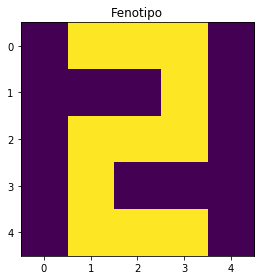

In [5]:
# genotype = np.random.randint(0,2, SIZE_MATRIX)
genotype = np.array([0,1,1,1,0,  0,0,0,1,0, 0,1,1,1,0,  0,1,0,0,0, 0,1,1,1,0])
plot_element(genotype, "Fenotipo")

Coparando os genes iguais

In [6]:
def generate_truth_table(individuals, genotype):
    return individuals == genotype

Somando para pegar os indivíduos com maior número de genes iguas

In [7]:
def sum_individuals (truth_table):
    return np.sum(truth_table, axis=1)

Gerando um dicionário para ordenar os elementos

In [8]:
def sort_individuals(sum_i):
    dic = {}
    for i in range(len(sum_i)):
        dic[i] = sum_i[i]

    return sorted(dic.items(), key=operator.itemgetter(1))

Algoritmo da roleta

In [9]:
def roulette(individuals, fitness):
    sum_fitness =  np.sum(fitness)
    new_individuals = individuals.copy()
    for i in range(SIZE_POPULATION):
        n = random.randint(0, sum_fitness)
        j = 0
        n = n - fitness[j]
        while n > 0 and j < (SIZE_POPULATION - 1):
            n = n - fitness[j]
            j = j + 1
            
        new_individuals[i] = individuals[j]
    
    return new_individuals

Função para determinar o ponto de corte

In [10]:
def new_court():
    percentage = random.randint(50, 60)
    return int(SIZE_MATRIX - (SIZE_MATRIX * percentage / 100))

Função de crossover

In [11]:
def crossover(individuals, sorted_d):
    i = 0
    while i < len(individuals):
        j = new_court()
        while j < SIZE_MATRIX:
            gene_parent_1 = individuals[sorted_d[i][0]][j]
            gene_parent_2 = individuals[sorted_d[i + 1][0]][j]
             
            individuals[sorted_d[i][0]][j] = gene_parent_2
            individuals[sorted_d[i + 1][0]][j] = gene_parent_1

            j += 1 


        i += 2
    return individuals



Função de mutação

In [12]:
def mutation(individuals):
    for i in range(SIZE_POPULATION):
        n = random.randint(0, SIZE_MATRIX -1)
        individuals[i][n] = int(not individuals[i][n])
    return individuals


Algorítimo genético

In [13]:
def genetic_algorithm(individuals, genotype):
    truth_table = generate_truth_table(individuals, genotype)
    fitness = sum_individuals(truth_table)
    new_individuals = roulette(individuals, fitness)
    new_truth_table = generate_truth_table(new_individuals, genotype)
    new_fitness = sum_individuals(new_truth_table)    
    sorted_d = sort_individuals(new_fitness)
    new_individuals = crossover(new_individuals, sorted_d)
   
    return mutation(new_individuals)

Verificar se existe o genótipo na lista de indivíduos

In [14]:
def exists_genotype_in_individuos(individuals, genotype):
    truth_table = generate_truth_table(individuals, genotype)
    sum_i = sum_individuals(truth_table)
    for i in range(SIZE_POPULATION):
        if(sum_i[i] == SIZE_MATRIX):
            return True, i
    else: return False

In [15]:
# list_individuals = []
count = 0

In [24]:
new_individuals = genetic_algorithm(individuals, genotype)
exits_genotype = exists_genotype_in_individuos(new_individuals, genotype)
exits_genotype = False
while not exits_genotype:
    new_individuals = genetic_algorithm(new_individuals, genotype)
    exits_genotype = exists_genotype_in_individuos(new_individuals, genotype)
    count += 1
#     list_individuals.append(new_individuals.copy())

Genótipo e indivíduo

In [25]:
print(genotype)
element = new_individuals[exits_genotype[1]]
print(element)

[0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0]
[0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0]


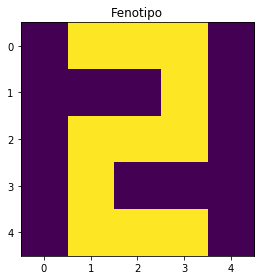

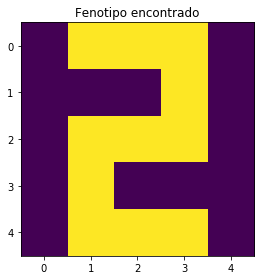

In [26]:
plot_element(genotype, "Fenotipo")
plot_element(element, "Fenotipo encontrado")

In [27]:
# print(len(list_individuals))
print(count)

124978


In [ ]:
# # First set up the figure, the axis, and the plot element we want to animate
# fig, ax = plt.subplots()

# # im = ax.imshow(np.asmatrix(list_individuos[0]))
# ax.set_title("INDIVIDUOS")
# fig.tight_layout()

# size_list = len(list_individuals)
# ax.matshow(list_individuals[0])

# # animation function. This is called sequentially
# def animate(i):
#     return ax.imshow(list_individuals[i]), 

# # call the animator. blit=True means only re-draw the parts that have changed.
# anim = animation.FuncAnimation(fig, animate, frames=size_list, blit=True)
# anim.save("movie.mp4")
# # plt.show()